In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
# function to convert txt into array of dataset --> returns array and size of data
def create_data (file, Class):
    
    arr = []
    x = -1
    for line in file:
        x = x+1
        if (x == 0):
            continue
        
        a = line.strip().split()
        for i in range(len(a)-5):
            arr.append(a[i+4])
        arr.append(Class)
    
    return arr, x

# inp is input array and count is the count of data
inp = []
count = 0    

# Building
file = open(r'uo1.txt')
arr, x = create_data(file,0)
inp += arr
count += x

# Vegetation
file = open(r'vo1.txt')
arr, x = create_data(file,0)
inp += arr
count += x

# Road
file = open(r'ro3.txt')
arr, x = create_data(file,1)
inp += arr
count += x

# Barren Land
file = open(r'bo2.txt')
arr, x = create_data(file,0)
inp += arr
count += x

print(count)
a = np.array(inp)
inp = a.reshape(count,16)
inp

453


array([['0.0858', '0.0897', '0.1013', ..., '0.10151875', '0.0972814',
        '0'],
       ['0.0862', '0.084', '0.0947', ..., '0.17875963', '0.08380593',
        '0'],
       ['0.0862', '0.1009', '0.1214', ..., '0.10107677', '0.040847216',
        '0'],
       ...,
       ['0.0741', '0.0877', '0.1074', ..., '0.14737953', '0.15927835',
        '0'],
       ['0.0741', '0.086', '0.1082', ..., '0.1966419', '0.09653831', '0'],
       ['0.0741', '0.086', '0.1082', ..., '0.1966419', '0.09653831', '0']],
      dtype='<U13')

In [3]:
DF = pd.DataFrame(inp)
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")
DF.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'PISI','NDVI','NDBI', 'Out']

DF.head(1000)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,PISI,NDVI,NDBI,Out
0,0.0858,0.0897,0.1013,0.1124,0.1136,0.1274,0.1328,0.1378,0.1425,0.1676,0.1675,0.1552,0.06945394,0.10151875,0.0972814,0
1,0.0862,0.084,0.0947,0.1013,0.1242,0.1514,0.1486,0.1454,0.1623,0.1638,0.172,0.154,0.060425896,0.17875963,0.08380593,0
2,0.0862,0.1009,0.1214,0.1294,0.1242,0.1514,0.1486,0.1585,0.1623,0.1638,0.172,0.154,0.06675753,0.10107677,0.040847216,0
3,0.0862,0.0948,0.1136,0.116,0.1338,0.1795,0.1843,0.199,0.2003,0.1638,0.1705,0.1399,0.03853366,0.26349208,-0.07713127,0
4,0.0862,0.0653,0.0897,0.083,0.1338,0.1795,0.1843,0.2151,0.2003,0.1638,0.1705,0.1399,0.005133909,0.4431399,-0.11566392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0741,0.0874,0.1044,0.1186,0.1334,0.1524,0.1604,0.167,0.1703,0.1815,0.2249,0.2044,0.05082358,0.16946776,0.1477418,0
449,0.0662,0.0826,0.1062,0.1212,0.1502,0.1716,0.1882,0.199,0.2084,0.181,0.2403,0.1895,0.028539417,0.24297313,0.0940132,0
450,0.0741,0.0877,0.1074,0.1212,0.1334,0.1524,0.1604,0.1631,0.1703,0.1815,0.2249,0.2044,0.05330599,0.14737953,0.15927835,0
451,0.0741,0.086,0.1082,0.1244,0.1334,0.1524,0.1604,0.1853,0.1703,0.1815,0.2249,0.2044,0.039181657,0.1966419,0.09653831,0


In [4]:
from sklearn.svm import SVC

X = DF.drop('Out',axis = 1)
Y = DF['Out']

model1 = SVC(kernel = 'linear', decision_function_shape='ovr')
model2 = SVC(kernel = 'poly', decision_function_shape='ovr')
model3 = SVC(kernel = 'rbf', decision_function_shape='ovo')
model4 = SVC(kernel = 'rbf', decision_function_shape='ovr')

model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)

SVC()

In [5]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)
pred3 = model3.predict(X)
pred4 = model4.predict(X)

from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(pred1,Y))
print(accuracy_score(pred2,Y))
print(accuracy_score(pred3,Y))
print(accuracy_score(pred4,Y))

0.9448123620309051
0.9977924944812362
0.9955849889624724
0.9955849889624724


In [6]:
print(confusion_matrix(Y, pred1))
print(confusion_matrix(Y, pred2))
print(confusion_matrix(Y, pred3))
print(confusion_matrix(Y, pred4))

[[428   0]
 [ 25   0]]
[[428   0]
 [  1  24]]
[[428   0]
 [  2  23]]
[[428   0]
 [  2  23]]


In [7]:
img2 = rasterio.open("test2.tif")
z2 = img2.read()

z2.shape

(16, 173, 118)

In [8]:


inp2 = []
for i in range(173):
    for j in range(118):
        for k in range(15):
            inp2.append(z2[k,i,j])
        #inp.append(ndvi[i,j])

print(len(inp2))

a = np.array(inp2)
inp2 = a.reshape(173*118,15)
inp2.shape

306210


(20414, 15)

In [9]:
import pandas as pd
DF2 = pd.DataFrame(inp2)
 
# save the dataframe as a csv file
DF2.to_csv("data2.csv")
DF2.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'PISI','NDVI','NDBI']

DF2.head(15)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,PISI,NDVI,NDBI
0,0.0785,0.0886,0.1116,0.1244,0.1388,0.1669,0.1778,0.1836,0.1868,0.1920,0.2245,0.2048,0.042287,0.192208,0.100221
1,0.0785,0.0844,0.1108,0.1158,0.1388,0.1669,0.1778,0.1908,0.1868,0.1920,0.2245,0.2048,0.034717,0.244618,0.081146
2,0.0785,0.0843,0.1072,0.1118,0.1306,0.1627,0.1713,0.1869,0.1808,0.1920,0.2111,0.1914,0.036871,0.251423,0.060804
3,0.0785,0.0810,0.1058,0.1100,0.1306,0.1627,0.1713,0.1780,0.1808,0.1920,0.2111,0.1914,0.039272,0.236111,0.085068
4,0.0785,0.0833,0.1034,0.1152,0.1324,0.1627,0.1665,0.1855,0.1772,0.1920,0.1921,0.1664,0.036855,0.233788,0.017479
5,0.0785,0.0852,0.1066,0.1102,0.1324,0.1627,0.1665,0.1830,0.1772,0.1920,0.1921,0.1664,0.039845,0.248295,0.024260
6,0.0785,0.0852,0.1066,0.1102,0.1324,0.1627,0.1665,0.1830,0.1772,0.1920,0.1921,0.1664,0.039845,0.248295,0.024260
7,0.0737,0.0732,0.0926,0.0918,0.1165,0.1749,0.1993,0.1898,0.2094,0.2046,0.1622,0.1198,0.026115,0.348011,-0.078409
8,0.0737,0.0650,0.0872,0.0747,0.1165,0.1749,0.1993,0.2326,0.2094,0.2046,0.1622,0.1198,-0.005148,0.513830,-0.178318
9,0.0737,0.0691,0.0891,0.0706,0.1076,0.1865,0.2045,0.2216,0.2099,0.2046,0.1503,0.1033,0.004519,0.516769,-0.191718


In [10]:
pred_22 = model2.predict(DF2)
pred_22

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

0 0
0 0


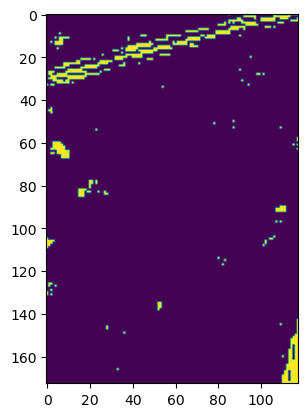

<AxesSubplot:>

In [11]:
a = np.array(pred_22)
pred_22 = a.reshape(173,118)

img = np.array(pred_22, dtype=np.uint8)
type(img[0,0])
img = img*255

print(img[0,40],pred_22[0,40])
print(img[25,0],pred_22[150,0])
#print(img[0,6],pred_22[0,6])

img3 = Image.fromarray(img)
img3.save('svm18_try2.png')
show(img3)